## 1. Checking the version of my Python

In [21]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1


## 2. Importing required libraries

In [3]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 3. Loading Dataset - Directly from UCI website (using the url)

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

## 4. Exploring the data

### 4.1. Dimensions of the data

In [5]:
print(dataset.shape) ## Shows 150 instances and 5 attributes

(150, 5)


### 4.2. Peeking into the data

In [6]:
print(dataset.head(10)) ## prints top 10 rows

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


### 4.3. Statistical Summary

In [7]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 4.4. Class Distribution

In [8]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 5. Data Visualization

### 5.1. Univariate Plots - To understand individual attribute

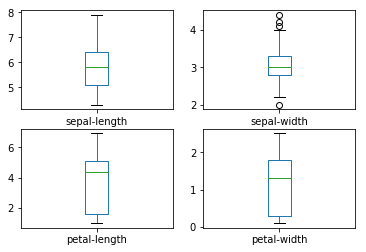

In [23]:
dataset.plot(kind='box', subplots = True, layout=(2,2),  sharex=False, sharey = False) ##shareX and shareY are 'False' by default
plt.show()

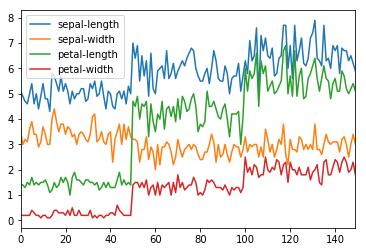

In [10]:
dataset.plot(kind='line')
plt.show()

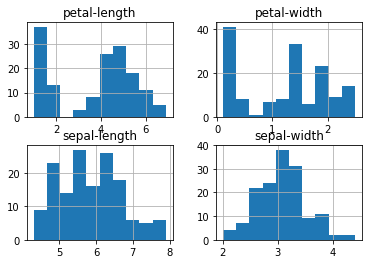

In [11]:
dataset.hist()
plt.show()

### 5.2. Multivariate Plots - To understand the relations between the attributes

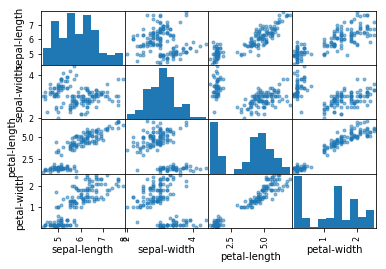

In [12]:
scatter_matrix(dataset)
plt.show()

## 6. Evaluation with Algorithms

### 6.1. Separating the validation set

In [13]:
array=dataset.values
X=array[:, 0:4]
Y=array[:,4]
validation_size=0.20
seed=7
X_train, X_validation, Y_train, Y_validation= model_selection.train_test_split(X,Y, train_size=validation_size, random_state=seed)

### 6.2. Test Harness

In [14]:
seed =7
scoring = 'accuracy'

### 6.3. Building Models

In [17]:
## Spot checking algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
## Evaluate Each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.800000 (0.221108)
LDA: 0.933333 (0.133333)
KNN: 0.933333 (0.133333)
CART: 0.933333 (0.133333)
NB: 0.966667 (0.100000)
SVM: 1.000000 (0.000000)


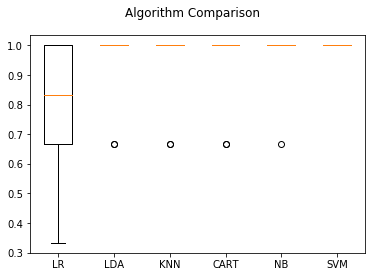

In [16]:
## Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6.4 Making Predictions

In [19]:
## Making prediction on the validation set using the most accurate model - KNN
## Summarizing the results as a final accuracy score, a confusion matrix and a classification report

knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.941666666667
[[41  0  0]
 [ 0 32  6]
 [ 0  1 40]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       0.97      0.84      0.90        38
 Iris-virginica       0.87      0.98      0.92        41

    avg / total       0.95      0.94      0.94       120



In [ ]:
## We can see that the accuracy is 0.9 or 90%. 
## The confusion matrix provides an indication of the three errors made. 
## Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support 
## showing excellent results (granted the validation dataset was small)